In [ ]:
%pylab --no-import-all
%matplotlib inline
from sacla import *

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
import idi.reconstruction as recon

In [4]:
l=log('2019 SACLA - Shotlog.csv')

In [5]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

In [5]:
l.search('Sample','14').iloc[:,:10]

Run start  last run Starttime   Endtime Sample  E_ph  \
           #         #      Time      Time #/desc   keV   
20    782070  782074.0  15:31:01  14:59:12     14  10.4   
21    782070  782074.0  15:31:01  14:59:12     14  10.4   
22    782070  782074.0  15:31:01  14:59:12     14  10.4   

                                          Pre Comment Pulse Energy  \
                                                 desc           uJ   
20               rotated Gas for rotated Kossel lines        530.0   
21  moving kossel lines by moving Sample Thz by 1 ...        530.0   
22                               Engineers Refocused.        530.0   

   Detector Filter Beamline filter  
              desc      mm Silicon  
20       50um Zink             0.5  
21       50um Zink             0.5  
22       50um Zink             0.5

In [147]:
l

In [ ]:
#to run: 97, 82, 83, 84, 87, 88, 93, 94
samples=[
'14',
# '14'
]

In [21]:
import glob
import os
def getlatest(search_dir=".",pattern='*',n=1):
    files = list(filter(os.path.isfile, glob.glob(search_dir +'/'+ pattern)))
    files = sorted(files,key=os.path.getmtime,reverse=True)[:n]
    if len(files)==1: return files[0]
    if len(files)==0: return None
    else: return tuple(files)

In [22]:
def append(dictionary,key,value):
    if not key in dictionary:
        dictionary[key]=[]
    dictionary[key].append(value)

In [ ]:
import gc
import shutil

def submit(r):
    runstart=int((r['Run start'][0]))
    runend=int(r['last run'][0])
    run=str(r.name)
    print(run)
    if int(run)>21: return
    for cr in range(runstart,runend+1):
        print(cr)
        shutil.copyfile(f'/UserData/gorkhover/TAIS2019/{cr}.h5', f'/work/gorkhover/zimmf/kossel/{cr}.h5')
        
for sample in samples:
    runs=l.search('Sample',sample)
    runs.apply(submit,axis=1)

In [2]:
import gc
gc.collect()

56

In [13]:
@asgen
def photons(img,photonadu,gain=1,thres=0.6):
    p=gain*np.squeeze(np.asarray(img))/photonadu
    p1=(np.trunc(p))#.astype(int)
    p=p-p1
    p2=(p>thres)#.astype(int)
    return p1+p2

In [6]:
psum=0
for cr in range(782095,782111+1):
    r=saclarun(f'/UserData/gorkhover/TAIS2019/{cr}.h5',settings=Tais2019)
    print(cr)
    psum+=np.sum(photons(r.detector_2d_1,9200/3.65,r.detector_2d_1.absolute_gain),axis=0)
bg=snd.gaussian_filter(psum,10)
plt.matshow(snd.gaussian_filter(psum-bg,2),vmax=10,vmin=-5)
plt.colorbar()


782095


NameError: name 'photons' is not defined

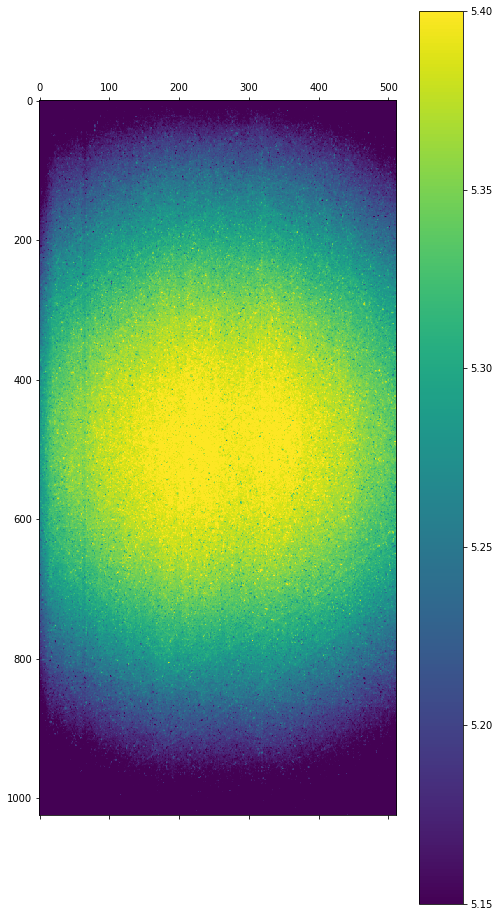

In [210]:
plt.matshow(np.log10(psum),vmax=5.4,vmin=5.15)
plt.colorbar()

In [ ]:
psum

In [1]:
1

1

In [ ]:
bg=snd.gaussian_filter(psum,5)
normed=psum#(psum-bg)/bg
dx=snd.sobel(normed,0)
dy=snd.sobel(normed,1)
plt.matshow(np.hypot(dx,dy),vmax=.5,vmin=-0.5)
plt.colorbar()

In [181]:
1

1

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


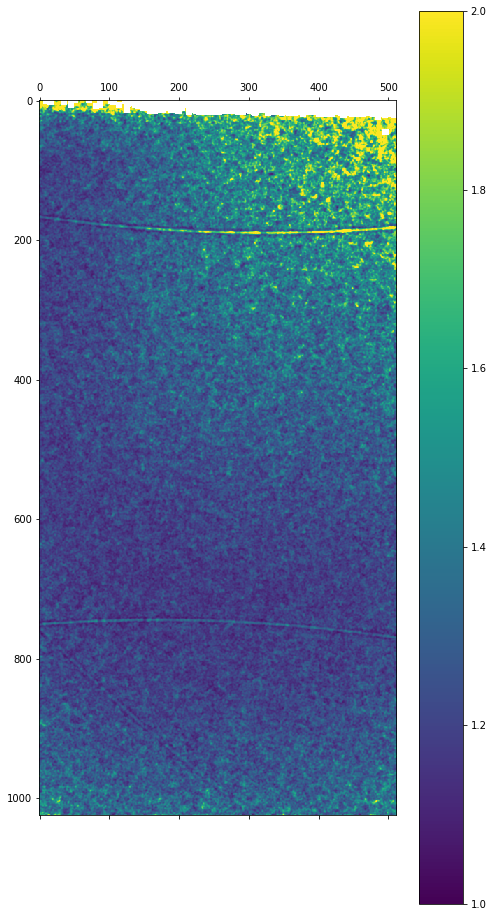

In [168]:
bg=snd.morphology.grey_opening(psum,size=(5,5))
plt.matshow(snd.gaussian_filter((psum)/bg,1),vmax=2,vmin=1)
plt.colorbar()

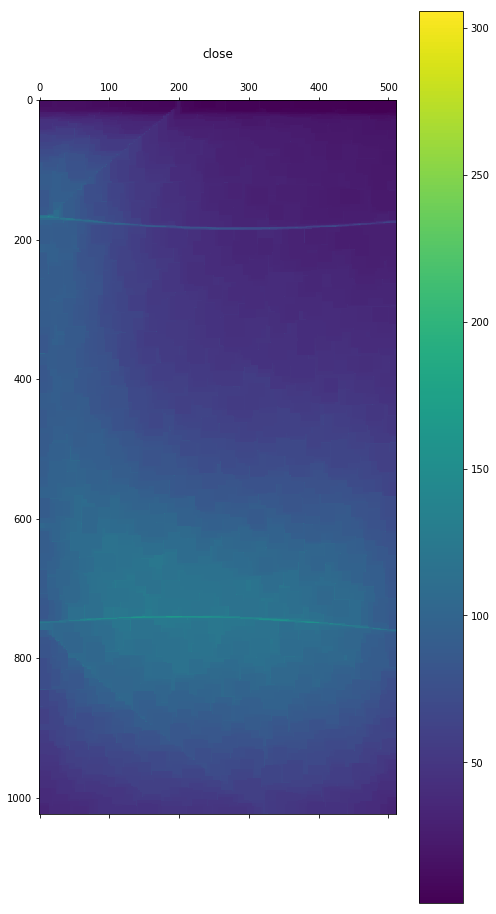

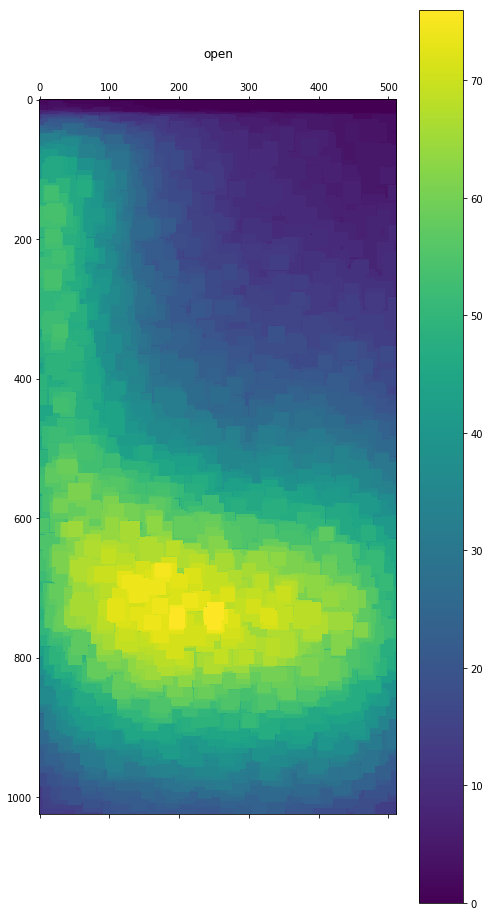

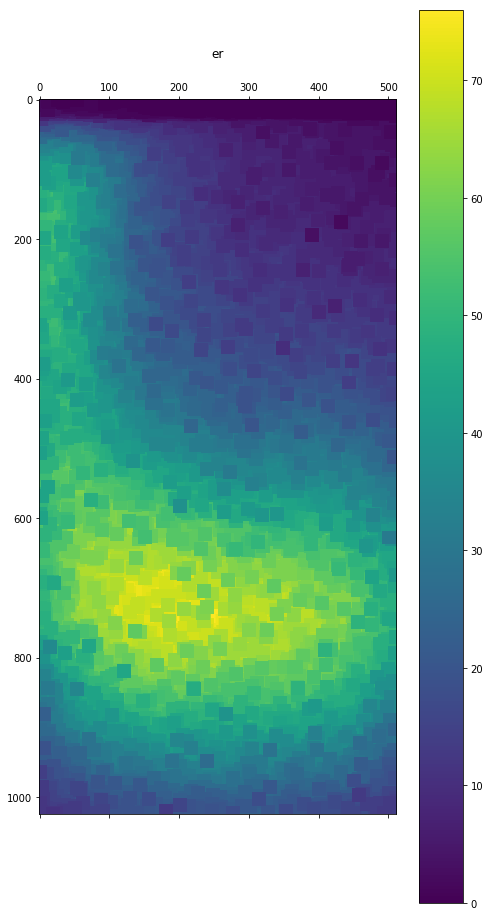

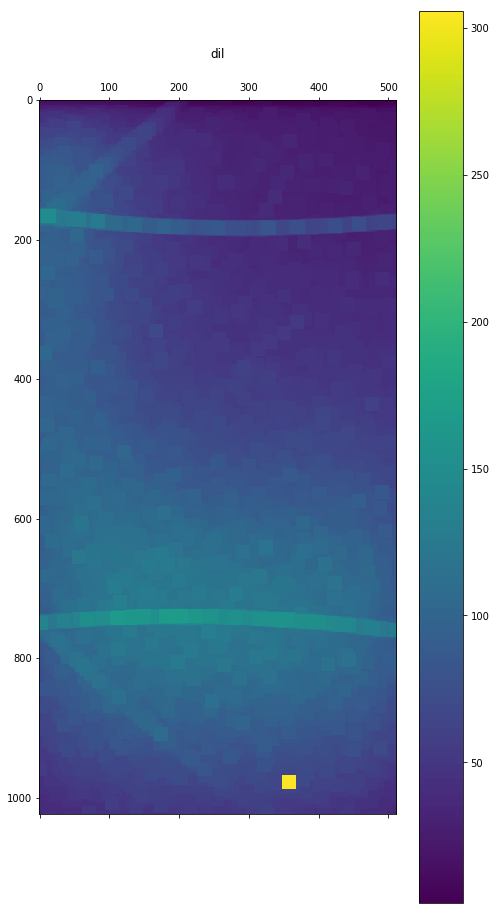

In [93]:

s=(20,20)


plt.matshow(snd.morphology.grey_closing(psum,size=s),vmax=50)
plt.colorbar()
plt.title('close')
plt.show()

plt.matshow(snd.morphology.grey_opening(psum,size=s),vmax=50)
plt.colorbar()
plt.title('open')
plt.show()


plt.matshow(snd.morphology.grey_erosion(psum,size=s),vmax=50)
plt.colorbar()
plt.title('er')
plt.show()


plt.matshow(snd.morphology.grey_dilation(psum,size=s),vmax=50)
plt.colorbar()
plt.title('dil')
plt.show()



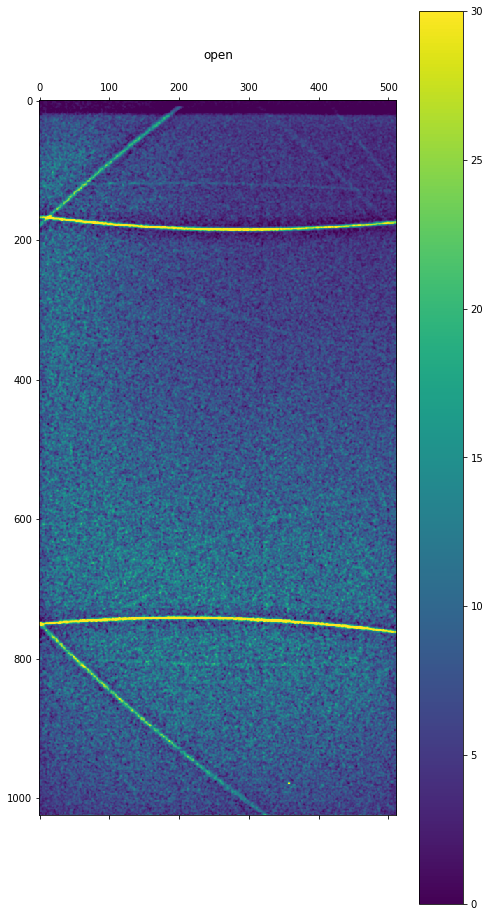

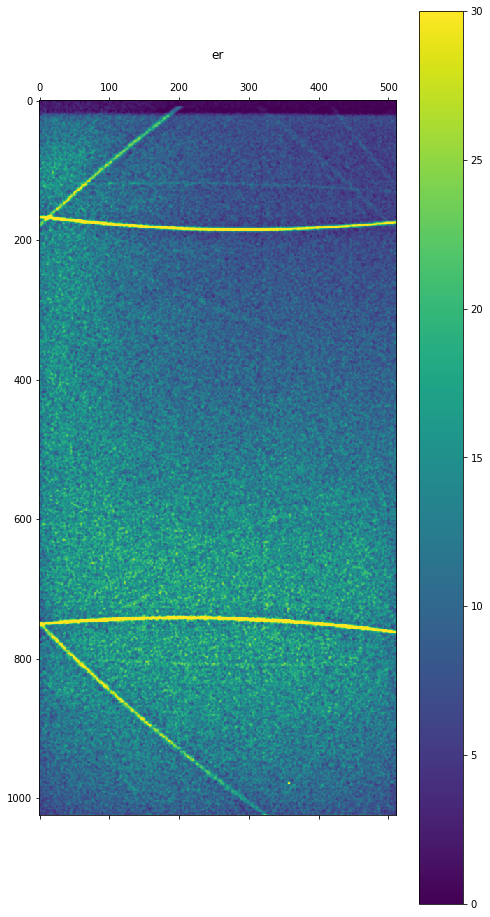

In [105]:
# plt.matshow(psum-snd.morphology.grey_closing(psum,size=s))
# plt.colorbar()
# plt.title('close')
# plt.show()
s=(4,4)
plt.matshow(snd.gaussian_filter(psum-snd.gaussian_filter(snd.morphology.grey_opening(psum,size=s),10),1),vmax=30,vmin=0)
plt.colorbar()
plt.title('open')
plt.show()


plt.matshow(snd.gaussian_filter(psum-snd.gaussian_filter(snd.morphology.grey_erosion(psum,size=s),10),1),vmax=30,vmin=0)
plt.colorbar()
plt.title('er')
plt.show()


# plt.matshow(psum-snd.morphology.grey_dilation(psum,size=s))
# plt.colorbar()
# plt.title('dil')
# plt.show()


In [7]:
plt.matshow(snd.gaussian_filter(psum-snd.gaussian_filter(snd.morphology.grey_erosion(psum,size=s),10),1),vmax=30,vmin=0)
plt.colorbar()
plt.title('er')
plt.show()


NameError: name 'snd' is not defined

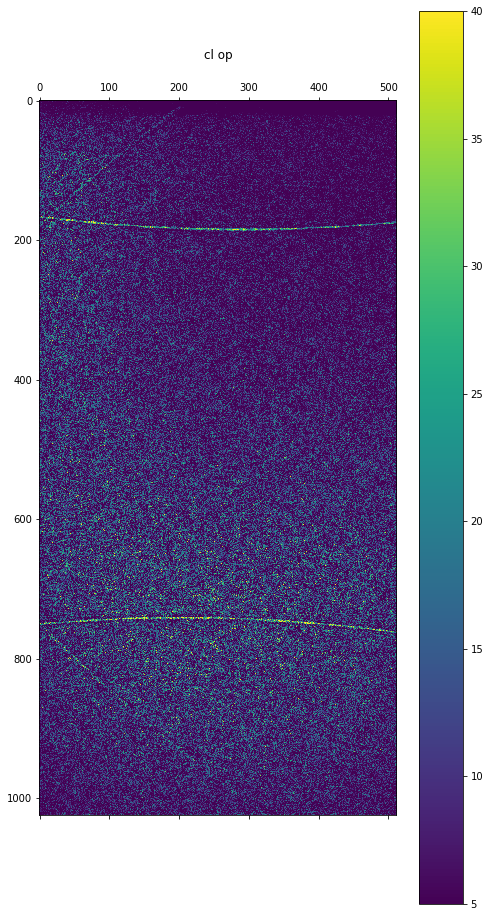

In [83]:
s=(4,4)
plt.matshow(psum-snd.morphology.grey_closing(snd.morphology.grey_opening(psum,size=s),size=s),vmax=40,vmin=5)
plt.colorbar()
plt.title('cl op')
plt.show()

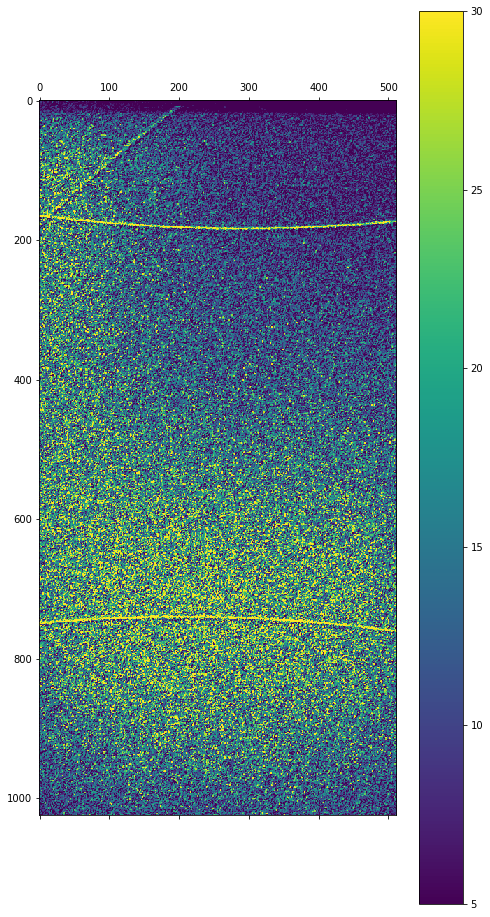

In [92]:
s=(2,2)
plt.matshow(snd.morphology.grey_dilation(psum,size=s)-snd.morphology.grey_erosion(psum,size=s),vmax=30,vmin=5)
plt.colorbar()

In [ ]:
import gc
import shutil
results={}

def append(dictionary,key,value):
    if not key in dictionary:
        dictionary[key]=[]
    dictionary[key].append(value)
def submit(r):
    runstart=int((r['Run start'][0]))
    runend=int(r['last run'][0])
    run=str(r.name)
    print(run)
        

    for cr in range(runstart,runend+1):
        print(cr)
        shutil.copyfile(f'/UserData/gorkhover/TAIS2019/{cr}.h5', f'/work/gorkhover/zimmf/kossel/{cr}.h5')
        
for sample in samples:
    runs=l.search('Sample',sample)
    runs.apply(submit,axis=1)

In [27]:
!ls /work/gorkhover/zimmf/kossel

In [7]:
for sample in samples:
    runs=l.search('Sample',sample)
    isatt=np.array(runs['Beamline filter']!='0')
    runs=runs[isatt]
    print(sample, end=': ')
    runs.apply(lambda r: print(r.name),axis=1)

10 mid: 87
10 low: 93
51, 10 high: 82
10 agar: 97
5 mid: 89
20 mid: 91


In [52]:
merged=np.load('/work/gorkhover/zimmf/93_merged.npz',allow_pickle=True)

In [17]:
list(merged.keys())

['inputfile',
 'outpath',
 'workpath',
 'run',
 'simple',
 'ft3d',
 'direct',
 'directrad',
 'detector',
 'energy',
 'z',
 'photonsthreshold',
 'pixelsize',
 'maximg',
 'allimg',
 'workfile',
 'outfile',
 'mask',
 'meanphotons',
 'stdphotons',
 'maxphotons',
 'nphotonsmax',
 'nphotonsmin',
 'photonsum',
 'bg',
 'mindist',
 'simple_mean',
 'ft3d_mean',
 'direct_mean',
 'directrad_mean',
 'simple_std',
 'ft3d_std',
 'direct_std',
 'directrad_std']

In [53]:
res=[]
for m,s in zip(merged['mask'],merged['simple_mean']):
    norm=recon.simple.corr(m)
    res.append(s/norm)

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [10]:
len(res)

21

In [16]:
mean=np.nanmean(np.array(res),axis=0)

In [17]:
np.nanmin(mean[600:-600,300:-300])

1.1669560183208267

In [19]:
np.nanmedian(mean[600:-600,300:-300])

1.1692600428447295

In [42]:
plt.rcParams['figure.figsize']=(15,15)
def plot(img):
    cimg=img[900:-900,400:-400]
    vmin=np.percentile(img,20)
    vmax=np.percentile(img,90)
    plt.matshow(img,vmin=vmin,vmax=vmax)
    plt.show()

In [44]:
from idi.util import radial_profile

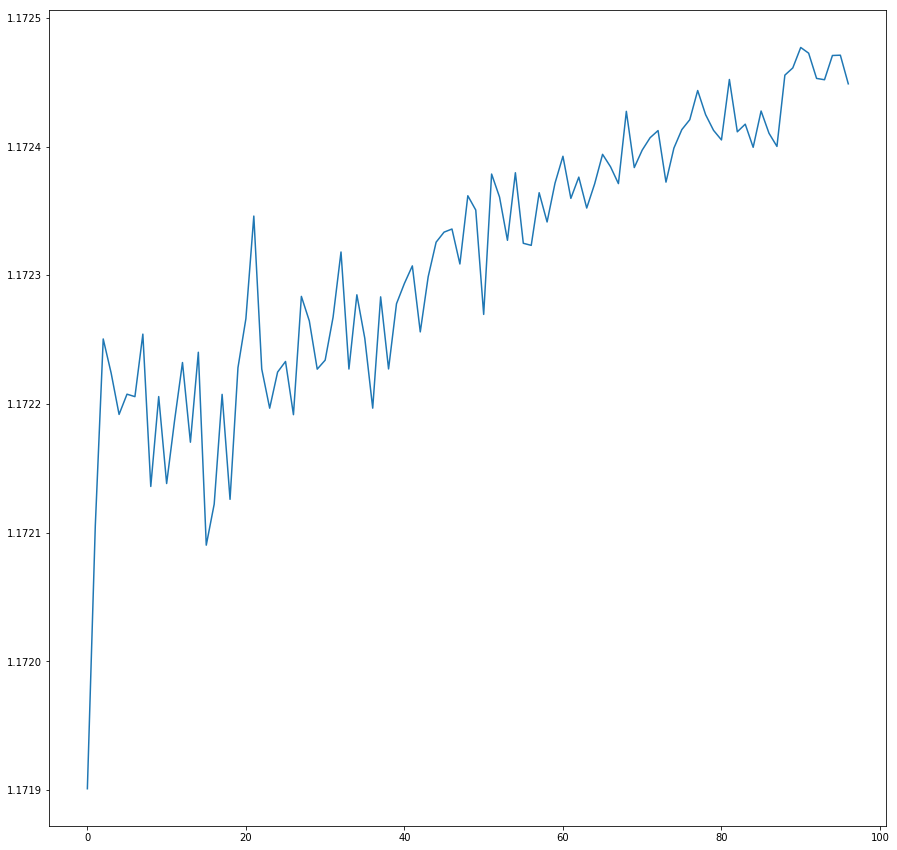

In [55]:
rad=0
for i,r in enumerate(res):
    rad+=radial_profile(r,np.array(r.shape)//2)
rad=rad/(i+1)
plt.plot(rad[3:100])
plt.show()

In [37]:
p=res87['meanphotons']

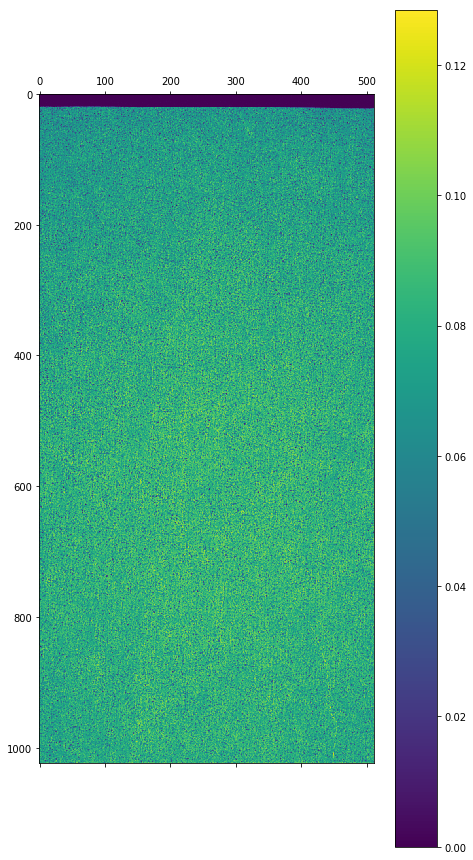

In [38]:
plt.matshow(p[0,...])
plt.colorbar()

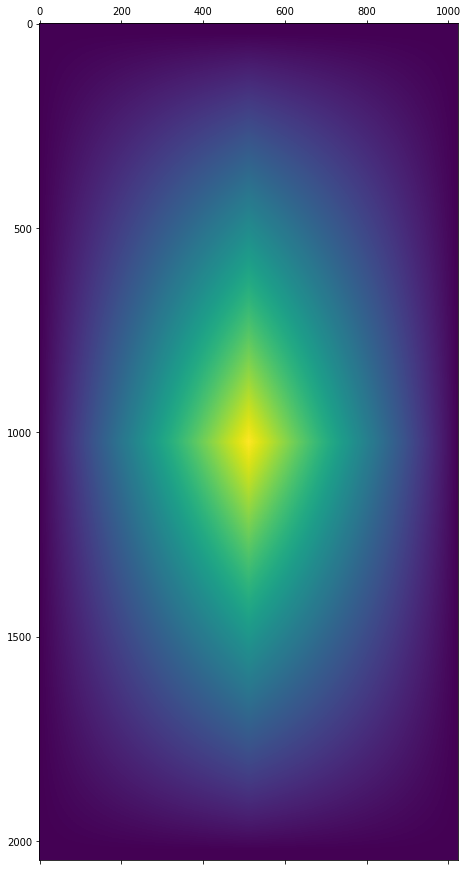

In [43]:
plt.matshow(norm)

In [ ]:
plt.matshow(meanpho)